Here, we want to how level that the electric near field just above cell affected by adjacent cells. In this simulation, we simulated the structure which we called "Alpha structure". After this struture , we will also apply same simulation mehod, factor to the structure , Beta and 2Alpha 1Beta and 2Beta 1 Alpha stucture.

In [23]:
import meep as mp
import numpy as np
import math
import matplotlib.pyplot as plt


# Set up Structure for Cell height = 600 nm situation
Factors  
PML thickness : 1 micrometer

Cell height : 600 nm

Cell width : 80 nm

Substract thickness : 1 micrometer

Substract refractive index : 2.6678

symmetry along y direction

In [24]:
#sim.reset_meep()

resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dca = 0.06  # air rigion between cell and cell
gp = 0.2  # grating periodicity
gh = 0.6  # grating height
gw = 0.08 # grating cell width

num_cells = 1  # number of grating unit cells

# air region thickness adjacent to grating
dair = 1

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency


glass = mp.Medium(index = 2.6678) # 把 paper 裡的材料 在對應波長下拿去查詢找到的 折射率值

pml_layers = [mp.PML(thickness = dpml, direction = mp.X)]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = gp*num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(fcen), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y = sy),
    )
]

geometry = [
    mp.Block(
        material = glass,
        size = mp.Vector3(dsub, mp.inf, mp.inf),
        center = mp.Vector3(-0.5 * sx + dpml + dsub/2),
    )
]


In [25]:
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material = glass,
            size = mp.Vector3(gh, gw, mp.inf),
            center = mp.Vector3(
                -0.5 * sx + dpml + dsub + gh/2,
                -0.5 * sy + gp/2 + (j * gp),
            ),
        )
    )


In [26]:
# 設定週期邊界條件
k_point = mp.Vector3()  # Gamma 點表示週期邊界條件
k_points = [k_point]

     block, center = (-0.8,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)


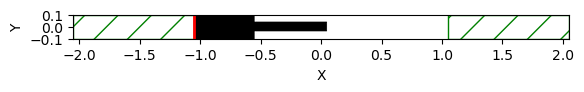

In [27]:
sim = mp.Simulation(
    cell_size = cell_size,
    boundary_layers = pml_layers,
    geometry = geometry,
    sources = sources,
    resolution = resolution,
    symmetries = symmetries,
    k_point = mp.Vector3(),
)

%matplotlib inline
plt.figure(dpi = 100)
sim.plot2D()
plt.show()

In [28]:

t_xx = (.532) # Air 光速跑完 波長 532 nm 入射光 所需的 meep unit time
dt = (t_xx / 40) # cut 40 sections in a period time
t = 1000 # Total simulation time

x_obs = -0.5 * sx + dpml + dsub + gh + 0.002  # Set up a x coordinate of observed point
y_obs_start = -0.5 * sy + gp/2  # Set up a y coordinate of observed point
y_obs = y_obs_start
print(int((t_xx)/dt))


40


-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00160193 s
Working in 2D dimensions.
Computational cell is 4.1 x 0.2 x 0 with resolution 500
     block, center = (-0.8,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.0825331 s
-----------
Meep progress: 11.878/1000.0 = 1.2% done in 4.0s, 332.8s to go
on time step 11878 (time=11.878), 0.000336759 s/step
Meep progress: 23.672/1000.0 = 2.4% done in 8.0s, 330.0s to go
on time step 23673 (time=23.673), 0.000339128 s/step
Meep progress: 35.044000000000004/1000.0 = 3.5% done in 12.0s, 330.5s to go
on time step 35045 (time=35.045), 0.000351774 s/step
Meep progress: 46.49

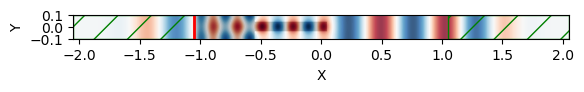

In [29]:

### ez_data_list = [[] for _ in range(int((t_xx)/dt))]
ez_data_list = []
###
def get_slice(sim): 
    ez_data_list.append(sim.get_array(center = mp.Vector3(x_obs,y_obs) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))

###
sim.run(mp.at_every(dt , get_slice) , until = t) # Make system record data every dt time duriing simulation.

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [30]:
ez_data_list = np.array(ez_data_list)
print(len(ez_data_list))
print(max(ez_data_list))
print(ez_data_list[20000])
print(1 + int(round(t_xx/dt)))

76923
(0.142948915567395+0j)
(-0.10402371115886781+0j)
41


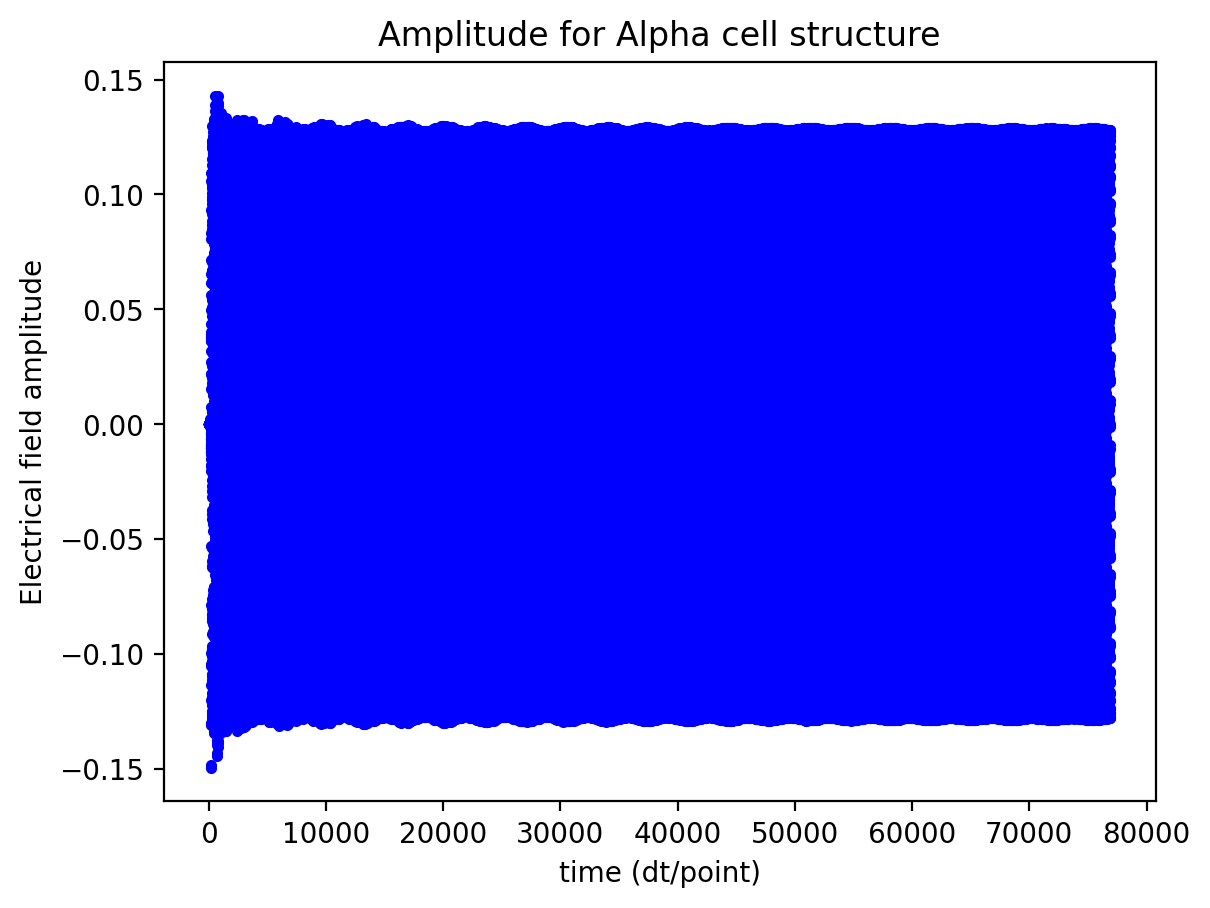

In [31]:
plt.figure(dpi = 200)
plt.title('Amplitude for Alpha cell structure')
plt.ylabel('Electrical field amplitude')
plt.xlabel('time (dt/point)')
for i in range( round(len(ez_data_list) * 0 / t) , round(len(ez_data_list) * t / t)):
    plt.plot(i , ez_data_list[i] , 'b.')
    


In [32]:
index1 = 0
index2 = 0

period_max = 0
period_next_max = 0

initial_index = round(len(ez_data_list) / t * 200 )
print(initial_index)
end_index = len(ez_data_list) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

15385
76841


(0.12943860130953186+0j) --------one period 內最大振福
(0.12943944557914108+0j) -------one next_period 內最大振福
(-8.442696092236801e-07+0j) -----振幅誤差
(array([16751]),) --- index1
(array([16792]),) --- index2
(0.12943860130953186+0j) 	 (0.12943944557914108+0j) 	 (-8.442696092236801e-07+0j) 	 (array([16751]),) 	 (array([16792]),) 


到達誤差範圍內的所需 meep time unit 108.88160888160888 

(0.1280243779345945+0j)


"\n    max(ez_data_list[i + int(round(t_xx/dt))]) - max(ez_data_list[i + int(round(t_xx/dt)) + int(round(t_xx/dt))])\n    if (m_ax - max_next_period) < 10**(-6) : \n        break\n    \nfor i in range( int(round(len(ez_data_list) / t * ( t - 250) )) , int(round(len(ez_data_list) / t * ( t - 0) ))) :\n    plt.plot(i,ez_data_list[i],'b.')\n# print(ez_data_list)"

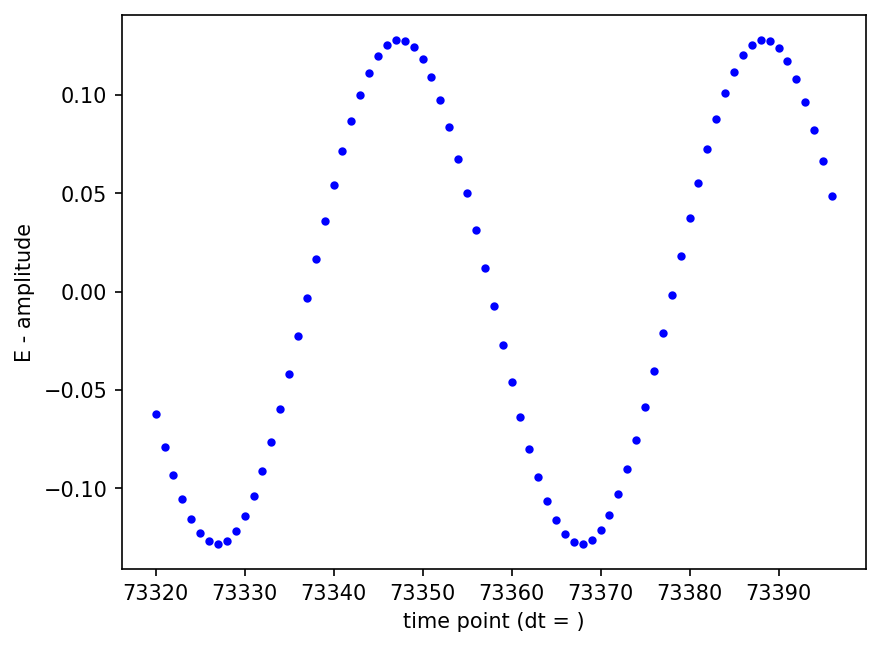

In [33]:

for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_list[j])
        period_next.append(ez_data_list[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '--------one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_list == period_max)
        print(index1, '--- index1')
        index2 = np.where(ez_data_list == period_next_max)
        print(index2, '--- index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        print('到達誤差範圍內的所需 meep time unit' , 16751 / len(ez_data_list) * 500 , '\n')
        break

dt_ = str(dt)
plt.figure(dpi = 150)
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_list[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_list[i] , 'b.')
    if max_value < ez_data_list[i] :
        max_value = ez_data_list[i]

print(max_value)


'''
    max(ez_data_list[i + int(round(t_xx/dt))]) - max(ez_data_list[i + int(round(t_xx/dt)) + int(round(t_xx/dt))])
    if (m_ax - max_next_period) < 10**(-6) : 
        break
    
for i in range( int(round(len(ez_data_list) / t * ( t - 250) )) , int(round(len(ez_data_list) / t * ( t - 0) ))) :
    plt.plot(i,ez_data_list[i],'b.')
# print(ez_data_list)'''

# Phase for cell height = 600 nm

# ---------------------Simulation for Cell height =  300 nm 的-----------------

In following simulation, we change height of cell. We make cell height as 300 nm, and other enviroment factors are the same.

Factors  
PML thickness : 1 micrometer

Cell height : 300 nm

Cell width : 80 nm

Substract thickness : 1 micrometer

Substract refractive index : 2.6678

symmetry along y direction

In [34]:

sim.reset_meep()
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.3  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 1  # number of grating unit cells

# air region thickness adjacent to grating
dair = 1

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency

glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = gp * num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y=sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]


In [35]:
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material = glass,
            size = mp.Vector3(gh, gw, mp.inf),
            center = mp.Vector3(
                -0.5 * sx + dpml + dsub + gh/2,
                -0.5 * sy + gp/2 + (j * gp),
            ),
        )
    )


In [36]:
# 設定週期邊界條件
k_point = mp.Vector3()  # Gamma 點表示週期邊界條件
k_points = [k_point]

     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.3,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)


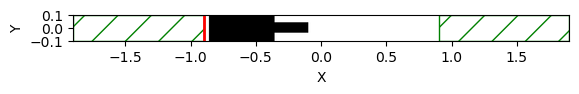

In [37]:
sim = mp.Simulation(
    cell_size = cell_size,
    boundary_layers = pml_layers,
    geometry = geometry,
    sources = sources,
    resolution = resolution,
    symmetries = symmetries,
    k_point = mp.Vector3(),
)

%matplotlib inline
plt.figure(dpi = 100)
sim.plot2D()
plt.show()

In [38]:

t_xx = (.532)   # 光走完 0.532 um 所需的 meep 時間單位
dt = (t_xx / 40)  # 在一個 sin 週期中，切 40 段
t = 1000

x_obs = -0.5 * sx + dpml + dsub + gh + 0.002  # 測點的 x 座標
y_obs_start = -0.5 * sy + gp/2  # # 測點的 y 起始座標
y_obs = y_obs_start
print(int((t_xx)/dt))

40


-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000877142 s
Working in 2D dimensions.
Computational cell is 3.8 x 0.2 x 0 with resolution 500
     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.3,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.092694 s
-----------
Meep progress: 8.85/1000.0 = 0.9% done in 4.0s, 448.0s to go
on time step 8850 (time=8.85), 0.000452047 s/step
Meep progress: 17.528/1000.0 = 1.8% done in 8.0s, 448.4s to go
on time step 17530 (time=17.53), 0.000460855 s/step
Meep progress: 26.321/1000.0 = 2.6% done in 12.0s, 443.9s to go
on time step 26323 (time=26.323), 0.000454975 s/step
Meep progress: 35.204/1000.0 = 3.5% d

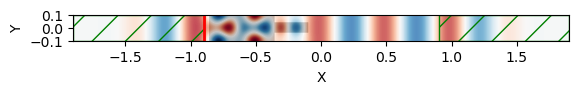

In [39]:
# 儲存場量數值的列表，定義為擁有 10 列的空二維陣列
### ez_data_list = [[] for _ in range(int((t_xx)/dt))]
ez_data_list = []
###
def get_slice(sim):
    ez_data_list.append(sim.get_array(center = mp.Vector3(x_obs,y_obs) , size = mp.Vector3(0,0) , component = mp.Ez))

###
sim.run(mp.at_every(dt , get_slice) , until = t)

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [40]:
ez_data_list = np.array(ez_data_list)
print(len(ez_data_list))
print(max(ez_data_list))
print(1 + int(round(t_xx/dt)))

76923
0.14783286075160076
41


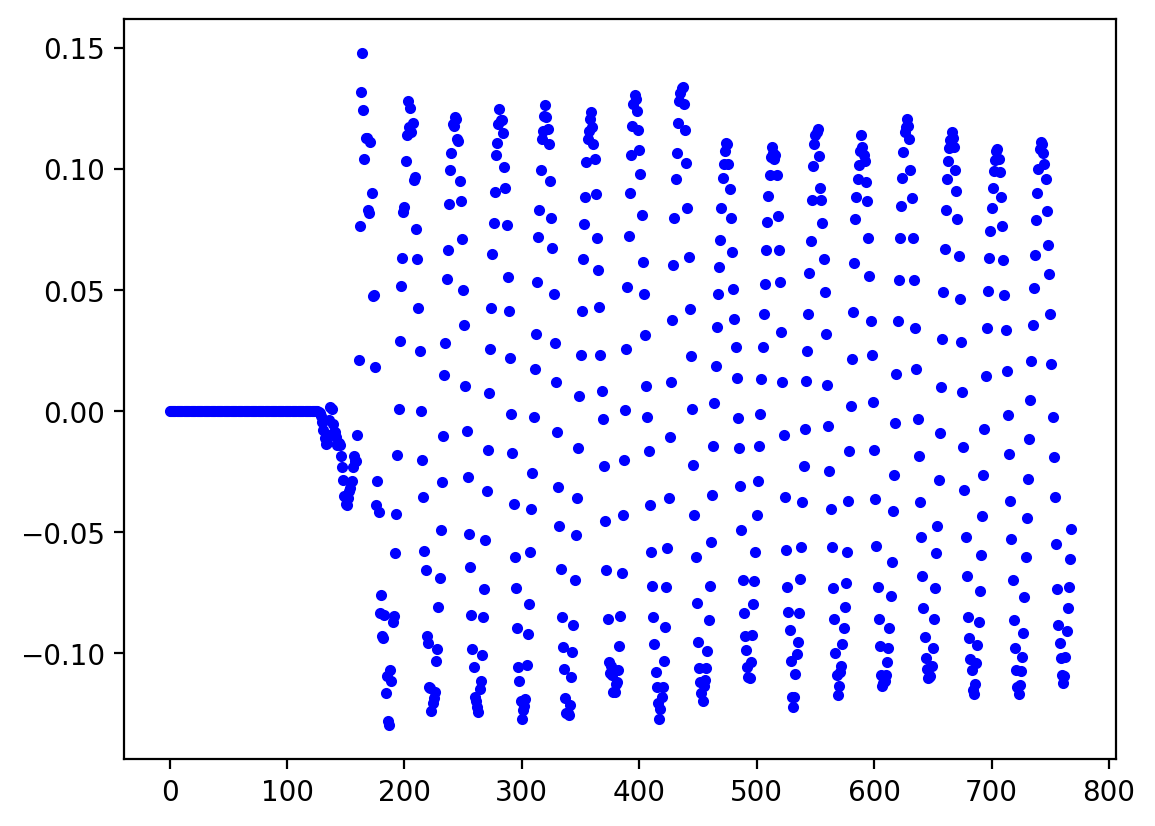

In [41]:
plt.figure(dpi = 200)
for i in range( round(len(ez_data_list) * 0 / t) , round(len(ez_data_list) * 10 / t)):
    plt.plot(i , ez_data_list[i] , 'b.')

In [42]:
index1 = 0
index2 = 0

period_max = 0
period_next_max = 0

initial_index = round(len(ez_data_list) / t * 200 )
print(initial_index)
end_index = len(ez_data_list) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

15385
76841


0.10724898805534153 --------one period 內最大振福
0.10724812616561993 -------one next_period 內最大振福
8.618897215928456e-07 -----振幅誤差
(array([31896]),) --- index1
(array([31935]),) --- index2
0.10724898805534153 	 0.10724812616561993 	 8.618897215928456e-07 	 (array([31896]),) 	 (array([31935]),) 


到達誤差範圍內的所需 meep time unit 108.88160888160888 

0.106779535118426


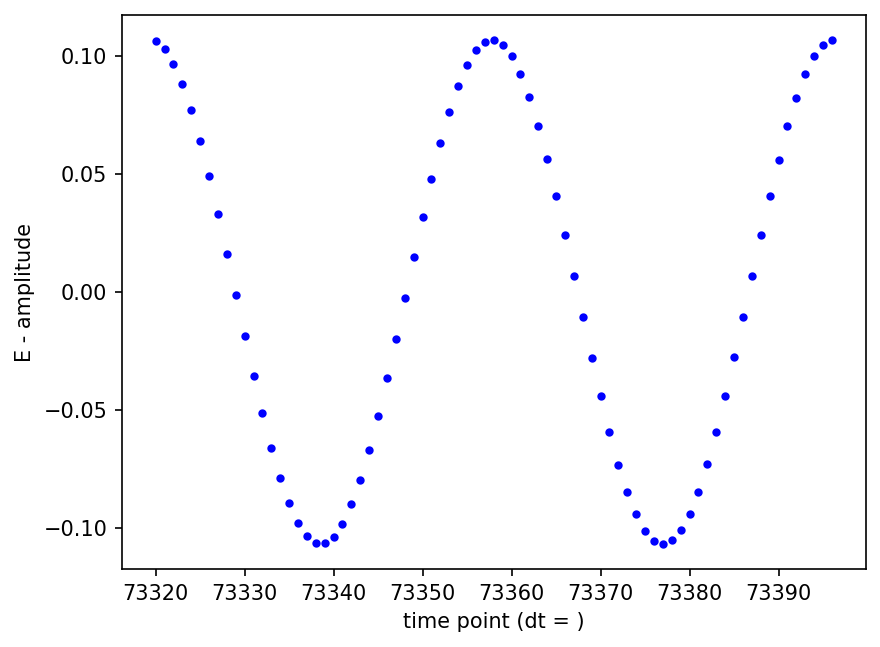

In [43]:

for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_list[j])
        period_next.append(ez_data_list[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '--------one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_list == period_max)
        print(index1, '--- index1')
        index2 = np.where(ez_data_list == period_next_max)
        print(index2, '--- index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        print('到達誤差範圍內的所需 meep time unit' , 16751 / len(ez_data_list) * 500 , '\n')
        break

dt_ = str(dt)
plt.figure(dpi = 150)
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_list[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_list[i] , 'b.')
    if max_value < ez_data_list[i] :
        max_value = ez_data_list[i]

print(max_value)
